
### Data Description

The bigdatamart_train dataset  is  dataset descibing about a big mart. In the first phase we have to train the data to predict
the output variable Item_Outlet_Sales using various attributes like item_type,Outlet_size,Outlet_location and many others.
after training the model

In the second phase we have to test a  new dataset using the trained model in which there is no output variable.
As a Item_Outlet_Sales is a continuous variable , it is a Regression type of problem



### Importing libraries

In [114]:
# importing necessary libraries
import pandas as pd
import numpy as np


### Loading Dataset

In [115]:
df=pd.read_csv("bigdatamart_Train.csv")

### Basic Insights of Dataset

In [116]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [117]:
# checking the columns name
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [118]:
# checking the datatypes of each columns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [119]:
# checking the dimension of the dataset
df.shape

(8523, 12)

In [120]:
#checking columns individually 

In [121]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
DRE49     9
FDU12     9
FDQ40     9
         ..
FDY43     1
FDQ60     1
FDT35     1
FDO33     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [122]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [123]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [124]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [125]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [126]:
df['Item_MRP'].unique()

array([249.8092,  48.2692, 141.618 , ...,  57.5904, 214.5218,  75.467 ])

In [127]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [128]:
df['Item_Visibility'].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [129]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [130]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [131]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [132]:
df['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

### checking for null values and treating them

In [133]:
# checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

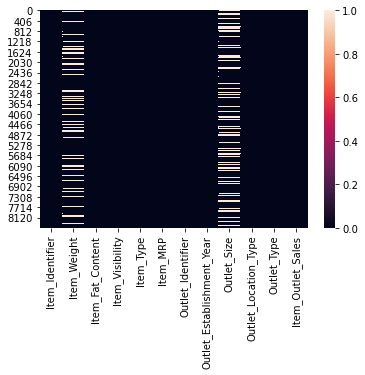

In [134]:
# visualizing the null values
import seaborn as sns
sns.heatmap(df.isnull())

The white lines in the heatmap indicates the presence of Null values in Item_Weight and Outlet_szie

### Treating Null Values

In [135]:
df['Item_Weight'].fillna(df['Item_Weight'].median(),inplace=True)

In [136]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode().values[0],inplace=True)

<AxesSubplot:>

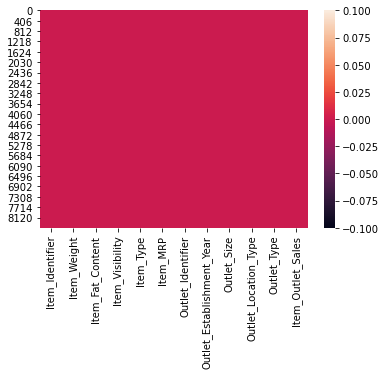

In [137]:
# visualizing the null values
import seaborn as sns
sns.heatmap(df.isnull())

all the null values are filled with median and mode

### visualizing the data

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


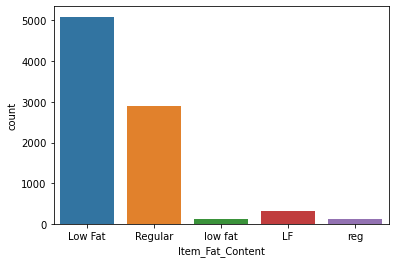

In [139]:
sns.countplot(x='Item_Fat_Content',data=df)
print(df['Item_Fat_Content'].value_counts())

the low fat is having the highest count as 5089 , then at second positon regular is there with counts 2889 , then comes the LF(low fat) with count
of 316 then reg  then again the low fat, 
as here because of case sensitivity low fat , LF and Low Fat are  differentiated ,
and regular and red also
so will treat it first

In [140]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')

In [141]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


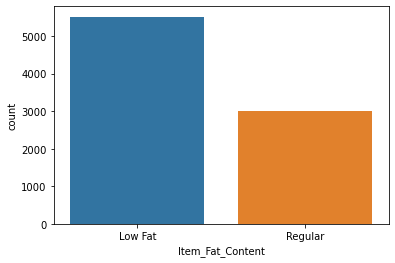

In [142]:
sns.countplot(x='Item_Fat_Content',data=df)
print(df['Item_Fat_Content'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


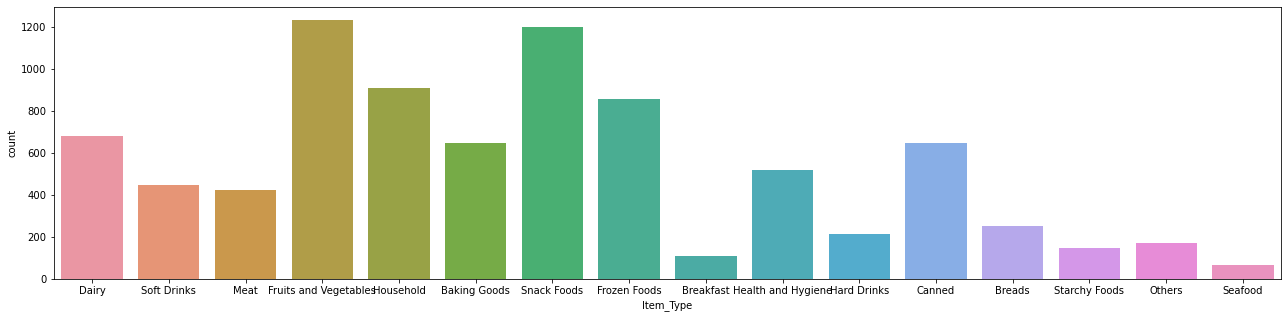

In [143]:
plt.figure(figsize=(22,5))
sns.countplot(x='Item_Type',data=df)
print(df['Item_Type'].value_counts())

the highest sale is of fruits and vegetables and the lowest is of seafood

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


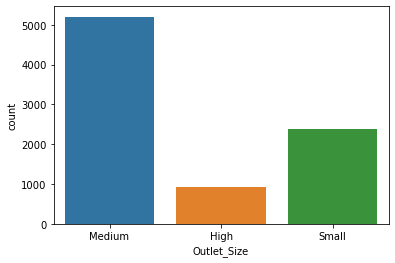

In [144]:
sns.countplot(x='Outlet_Size',data=df)
print(df['Outlet_Size'].value_counts())

the highest outlet size is medium followed by small and then High

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


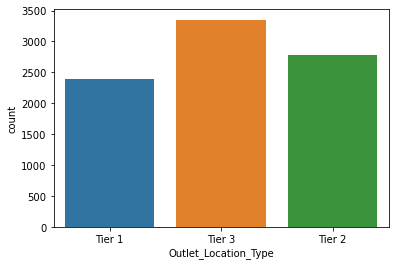

In [145]:
sns.countplot(x='Outlet_Location_Type',data=df)
print(df['Outlet_Location_Type'].value_counts())

the Tier 3 is the highest outlet location  type then at seocnd place is Tier 2 and finally the lowest is Tier 1

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


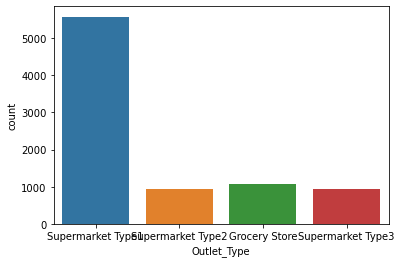

In [146]:
sns.countplot(x='Outlet_Type',data=df)
print(df['Outlet_Type'].value_counts())

items highest outlet sale is at supermarket type 1 with a score of 5571 then  grocery store has score of 1277 followed by supermarket type 3 then supermarket type 2

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


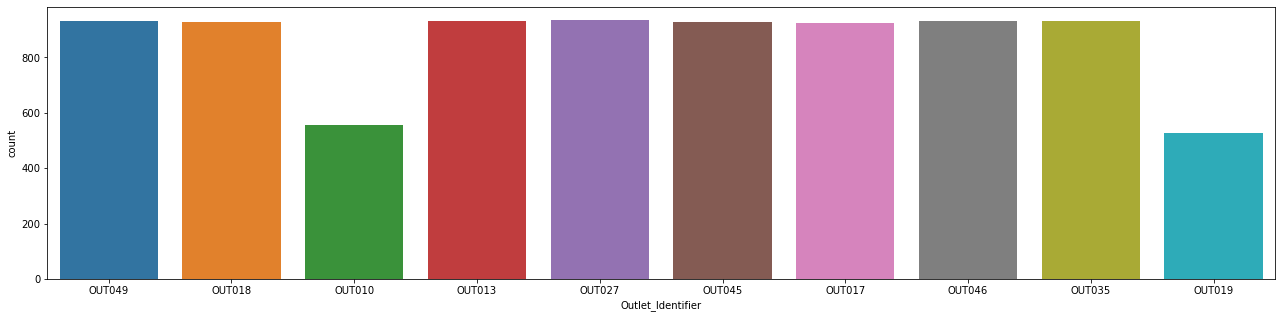

In [147]:
plt.figure(figsize=(22,5))
sns.countplot(x='Outlet_Identifier',data=df)
print(df['Outlet_Identifier'].value_counts())

the out027 has the highest outlet sale and the out019 has the lowest

### visualizing the float columns

<AxesSubplot:ylabel='Frequency'>

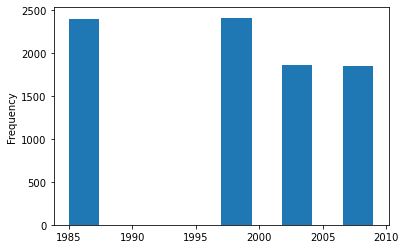

In [148]:
import warnings
warnings.filterwarnings('ignore')
df['Outlet_Establishment_Year'].plot.hist()

between 1985 to 2000 highest sale is recorded to be more than 2000

<AxesSubplot:ylabel='Frequency'>

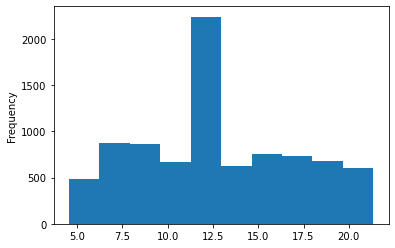

In [149]:
df['Item_Weight'].plot.hist()


more than 2000 items have weight of 12.5

<AxesSubplot:ylabel='Frequency'>

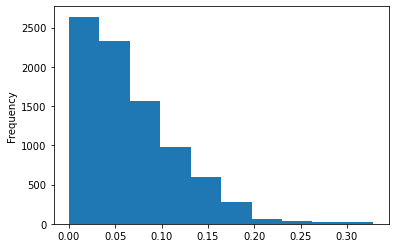

In [150]:
df['Item_Visibility'].plot.hist()

the columns item_visibility shows the right skewness

<AxesSubplot:ylabel='Frequency'>

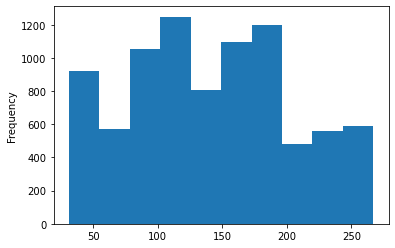

In [151]:
df['Item_MRP'].plot.hist()

more tha 800 products have item MRP between 100 to 200

<AxesSubplot:ylabel='Frequency'>

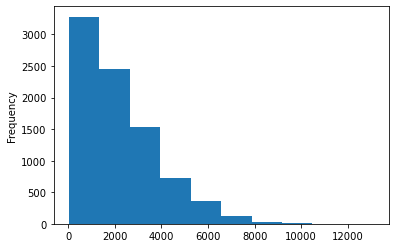

In [152]:
df['Item_Outlet_Sales'].plot.hist()

Output variable also shows the Right skewness 

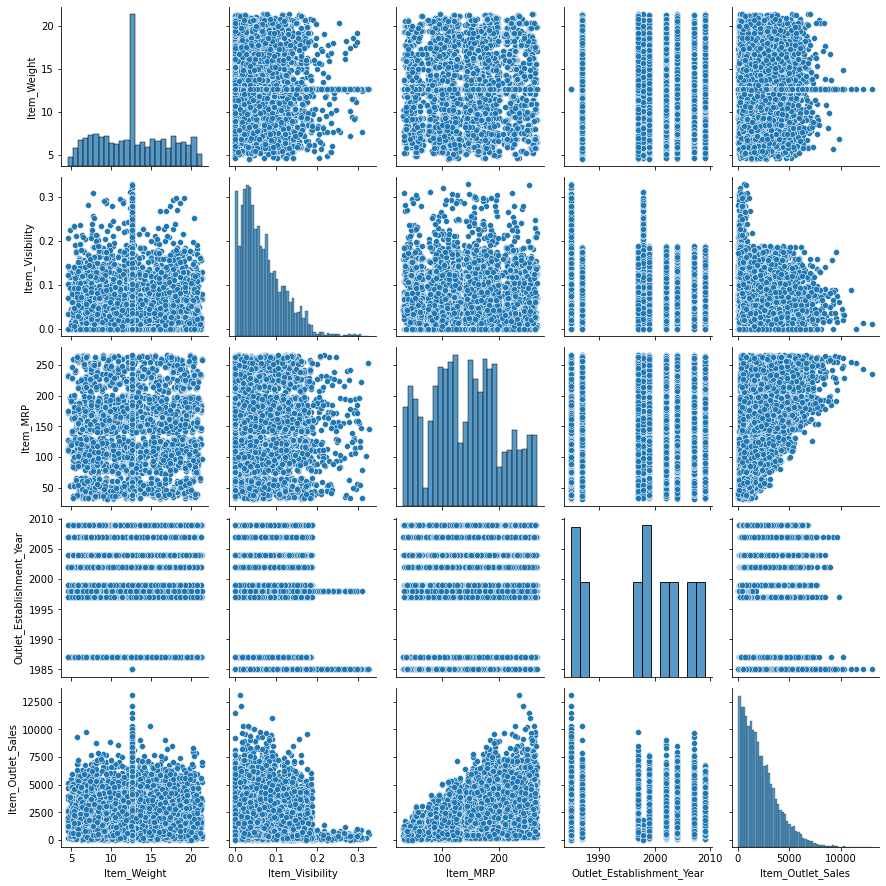

In [153]:
sns.pairplot(df)

###  Label encoding

In [154]:
from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [155]:
for i in df.columns:
    if df[i].dtypes == object:
        df[i]=le.fit_transform(df[i])

In [156]:
# rechecking the dataset after label Encoding
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


all the object columns are tranformed in integer column

### statistically analyzing the data

In [157]:
df.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.81342,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.22724,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.55500,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.31000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.60000,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.00000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.35000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


Observations  :-

1) In  Item_Identifier, 
        Item_Weight, 
        Item_Visibility, 
        Item_Mrp,
        Outlet_Establishment_Year,
        Item_Outlet_sales there is a difference between the 75% and max indicating as Outliers are present

2)  and as the mean and 50th percentile in all columns dont have much differnce within all columns it means chances of         skewness are low

3)   The standard deviation of Item_Identifier ,   Item_MRP , Item_Outlet_Sales are really high it means that the data of      these columns are highly spread 

4)  In item MRP and Item_Outlet_sales, there is significant differnce between min and 25 % indicating the presence of          whiskers
 

### Checking Correlation

Correlation is a statistical metric for measuring to what extent  different variables are Interdependent .

In another word, if one variable changes how it affects the change in another variable

In [158]:
dfcor=df.corr()

<AxesSubplot:>

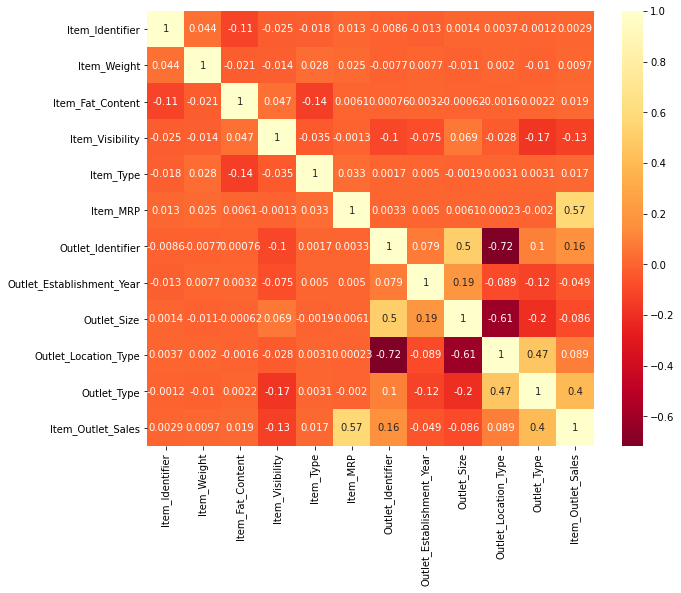

In [159]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

Observation :-


1)Item outlet sales is positively correlated with Item_Mrp and Outlet type then outlet Identifier 


2) and Item_Outlet_sales is  negatively correlated with Outlet_Establishment year, outlet_size

3) Outlet_identifier and Outlet Establishment year are highlt correlated

4) Outlet Type and Outlet_Location_Type are negatively correlated

###  Checking for the Outliers

Item_Identifier        AxesSubplot(0.125,0.125;0.110714x0.755)
Item_Weight         AxesSubplot(0.257857,0.125;0.110714x0.755)
Item_Fat_Content    AxesSubplot(0.390714,0.125;0.110714x0.755)
Item_Visibility     AxesSubplot(0.523571,0.125;0.110714x0.755)
Item_Type           AxesSubplot(0.656429,0.125;0.110714x0.755)
Item_MRP            AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

<Figure size 1584x864 with 0 Axes>

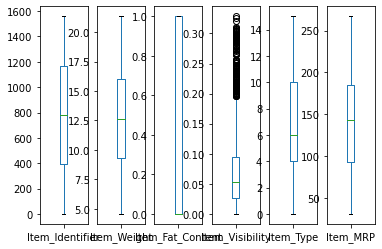

In [160]:
#plotting Outliers
plt.figure(figsize=(22,12))
df.iloc[:,0:6].plot(kind="box",subplots=True)

Item_visibility has highest number of outliers

Outlet_Identifier               AxesSubplot(0.125,0.125;0.110714x0.755)
Outlet_Establishment_Year    AxesSubplot(0.257857,0.125;0.110714x0.755)
Outlet_Size                  AxesSubplot(0.390714,0.125;0.110714x0.755)
Outlet_Location_Type         AxesSubplot(0.523571,0.125;0.110714x0.755)
Outlet_Type                  AxesSubplot(0.656429,0.125;0.110714x0.755)
Item_Outlet_Sales            AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

<Figure size 1584x864 with 0 Axes>

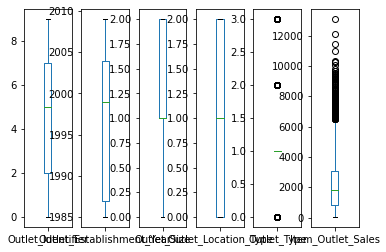

In [161]:
#plotting Outliers
plt.figure(figsize=(22,12))
df.iloc[:,6:].plot(kind="box",subplots=True)

herev item_outlet_sales is having highest number of outliers

In [162]:
# Removig outliers
from scipy.stats import zscore
z=np.abs(zscore(df))

In [163]:
z

array([[1.38851383, 0.83118663, 0.73814723, ..., 1.36933384, 0.25265831,
        0.910601  ],
       [1.71799137, 1.63080955, 1.35474328, ..., 1.09156913, 1.00297245,
        1.01844035],
       [0.26205684, 1.10872696, 0.73814723, ..., 1.36933384, 0.25265831,
        0.04923754],
       ...,
       [1.28515188, 0.52363935, 0.73814723, ..., 0.13888236, 0.25265831,
        0.57909963],
       [0.21975905, 1.32562802, 1.35474328, ..., 1.09156913, 1.00297245,
        0.19672492],
       [1.62449099, 0.46997492, 0.73814723, ..., 1.36933384, 0.25265831,
        0.82959407]])

In [164]:
df_new=df[(z<3).all(axis=1)]

In [165]:
df_new.shape , df.shape

((8338, 12), (8523, 12))

In [166]:
#percentage of outliers
((8523-8338)/8338)*100

2.2187574958023504

only 2 percent data is removed as Outliers

In [167]:
df=df_new

###  checking skewness

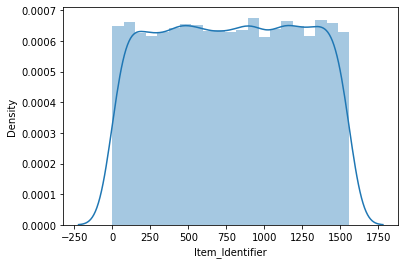

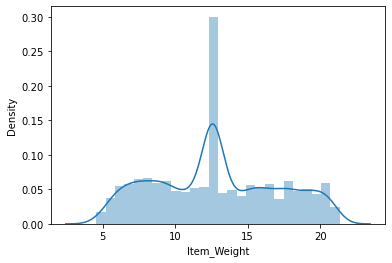

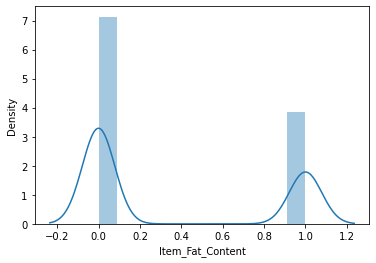

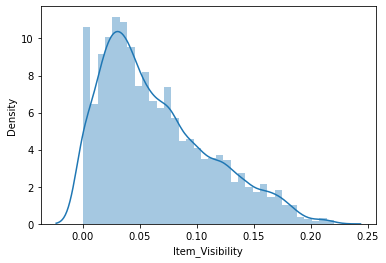

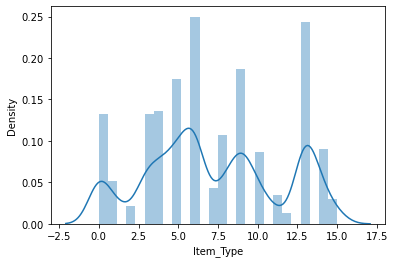

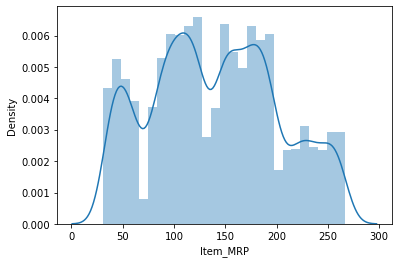

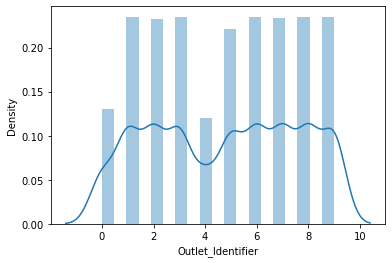

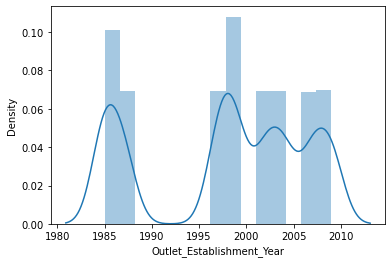

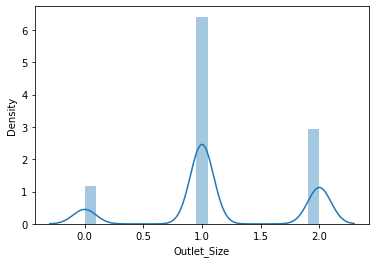

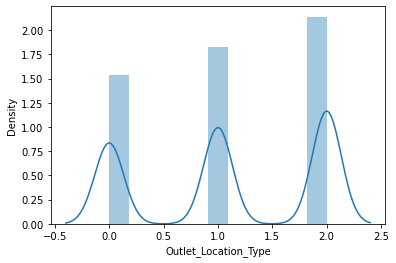

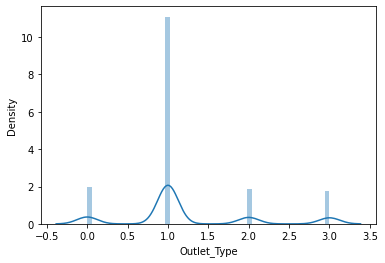

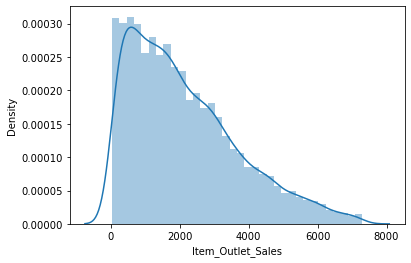

In [168]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

visually it can be concluded that skewness is present in item_visibility ,item_Outlet_sales and others

In [169]:
# statistically checking skewness
df.skew()

Item_Identifier             -0.007837
Item_Weight                  0.118615
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Identifier           -0.065135
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
Item_Outlet_Sales            0.878267
dtype: float64

here skewness of item_visibility, item_fat_content , outlet_type and Item_outlet_sales is above 0.5 percent so its necessary to treat it

###  Splitting data in X and Y

In [170]:
x=df.iloc[:,:-1]
x.head()
xcol=x.columns
print(xcol)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [171]:
y=df.iloc[:,-1]
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [172]:
#removing skewness

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import power_transform

df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [173]:
x=df_new

In [174]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.459702,-0.804088,-0.736645,-1.141715,-0.712790,1.640811,1.417704,0.029416,-0.287604,-1.375816,-0.134678
1,-2.093720,-1.729200,1.357506,-1.032542,1.506345,-1.591460,-0.557335,1.449643,-0.287604,1.095089,1.056886
2,-0.154073,1.087216,-0.736645,-1.117360,0.684664,0.097475,1.417704,0.029416,-0.287604,-1.375816,-0.134678
3,0.771153,1.439726,1.357506,-1.733193,-0.215907,0.707513,-1.816508,-0.095546,-0.287604,1.095089,-1.971851
4,1.094946,-0.899689,-0.736645,-1.733193,0.468417,-1.471032,-1.351820,-1.296374,-1.916825,1.095089,-0.134678


### selecting the best random state

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [176]:
maxr2score=0
maxrandomstate=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    predlg=lg.predict(x_test)
    r2score=r2_score(y_test,predlg)
    if r2score > maxr2score:
        maxr2score = r2score
        maxrandomstate = i
print(f"max r2score is {maxr2score} at a random_state of {maxrandomstate}")

max r2score is 0.5451676475905163 at a random_state of 378


at the random state of 378 we are getting the highest accuracy of .54

In [177]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=378)
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(r2_score(y_test,predlr))

0.5451676475905163


###  cross validation of the model


In [178]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cvs=cross_val_score(lr,x,y,cv=i)
    cvsmean=cvs.mean()
    print(f"At cv= {i} the cross val score is {cvsmean}")
    print("\n")

At cv= 2 the cross val score is 0.5150593105261572


At cv= 3 the cross val score is 0.5151815064183003


At cv= 4 the cross val score is 0.5140670775080705


At cv= 5 the cross val score is 0.5149752148047944


At cv= 6 the cross val score is 0.5152183208443607


At cv= 7 the cross val score is 0.515461391945878


At cv= 8 the cross val score is 0.5148956454063501


At cv= 9 the cross val score is 0.5150752625157755




at cross val score of 7 we have got highest accuracy of 51.54

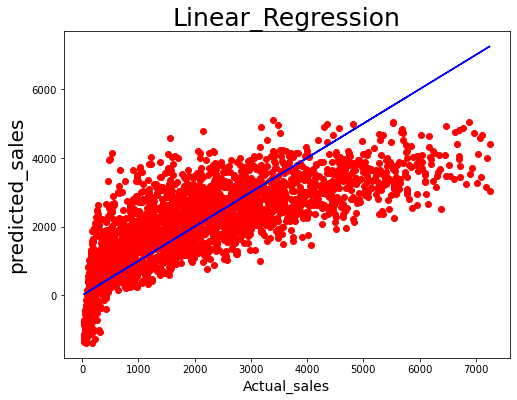

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predlr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual_sales",fontsize=14)
plt.ylabel("predicted_sales",fontsize=20)
plt.title("Linear_Regression",fontsize=25)
plt.show()

Best Fit Line covering most of the datapoint which shows good fit of our model 

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [182]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

pred_ls = ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5452164423610057

In [183]:
cv_score=cross_val_score(ls,x,y,cv=7)
cv_mean=cv_score.mean()
cv_mean

0.5155202701449048

### Ensembling Technique

In [184]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
            'max_features':["auto","sqrt",'log2']
           }
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [185]:
rf=RandomForestRegressor(criterion='mae' ,max_features='sqrt')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs= r2_score(y_test,pred_rf)
print("R2_score",rfs*100)


R2_score 58.8826098093574


### Exporting the Model

In [186]:
import pickle
filename='bigmartdata.pkl'
pickle.dump(rf,open(filename,'wb'))

### Loading the Test Data

In [187]:
import pandas as pd


In [188]:
df_test=pd.read_csv("bigdatamart_Test.csv")

In [189]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [190]:
df_test.shape

(5681, 11)

In [191]:
df_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [193]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [194]:
#removing null values

In [195]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].median(),inplace=True)

In [196]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode().values[0],inplace=True)

### Label Encoding

In [197]:
from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [198]:
for i in df_test.columns:
    if df_test[i].dtypes == object:
        df_test[i]=le.fit_transform(df_test[i])

In [199]:
# Removig outliers
from scipy.stats import zscore
z=np.abs(zscore(df_test))

In [200]:
df_test_new=df_test[(z<3).all(axis=1)]

In [201]:
df_test_new.shape , df_test.shape

((5525, 11), (5681, 11))

In [202]:
#percentage of outliers
((5681-5525)/5681)*100

2.745995423340961

In [203]:
df_test.skew()

Item_Identifier             -0.000020
Item_Weight                  0.166489
Item_Fat_Content             0.999629
Item_Visibility              1.238312
Item_Type                    0.096486
Item_MRP                     0.136182
Outlet_Identifier           -0.060209
Outlet_Establishment_Year   -0.396306
Outlet_Size                 -0.087108
Outlet_Location_Type        -0.209049
Outlet_Type                  0.927446
dtype: float64

In [205]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,4,0.038428,4,87.3198,2,2007,1,1,1
2,1406,14.600,1,0.099575,11,241.7538,0,1998,1,2,0
3,809,7.315,1,0.015388,13,155.0340,2,2007,1,1,1
4,1184,12.500,2,0.118599,4,234.2300,5,1985,1,2,3


### loading data in Trained Model

In [206]:

fitted_model=pickle.load(open('bigmartdata.pkl','rb'))

In [207]:
predictions=fitted_model.predict(df_test)

In [208]:
predictions

array([4022.56386 , 3999.267518, 3612.49764 , ..., 4031.332446,
       4010.393036, 4057.98442 ])

### Conclusion

here we have predicted the test data using trained model and we have successfully got the output 